# Similarity of Enantiomers with chiral Morgen FPs
At which point the Morgang fingerprints become unable to distinuish enantiomers because the substituents of the chiral center cannot be dismabuigated within the fingerprint radius?

The case study are homologues of iso-butanol
C\[C\@\@H\]\(O\)CC versus C\[C\@H\]\(O\)CC, CC\[C\@\@H\]\(O\)CCC versus CC\[C\@H\]\(O\)CCC, ... C<sub>n</sub>C\[C\@\@H\]\(O\)CCC<sub>n</sub> versus C<sub>n</sub>C\[C\@H\]\(O\)CCC<sub>n</sub>, with n the length of the alkyl chain on either side

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
print('Using rdkit version: ',rdkit.__version__)

Using rdkit version:  2019.03.3


* Define the meaxmimal fingerprint radius to study
* Define the maximal number of carbon atoms to add to either side
* Prepare the dataframe for smiles and similarity values

In [3]:
length_limit = 15
radius_limit = 5
rdkit_sim_df = pd.DataFrame(np.zeros((length_limit,radius_limit)),index=range(length_limit),columns=range(radius_limit))
smiles_df = pd.DataFrame(np.nan,index=range(length_limit),columns=['smiles_a','smiles_b'])
rdkit_sim_df.index.name = 'n'

Generate the enantiomer pairs and calculate chiral Morgan FP Tanimozo Similarities

In [4]:
a_template = 'C[C@@H](O)CC'
b_template = 'C[C@H](O)CC'
for  n in range(length_limit):
    #create the smiles, and turn the into molecules
    a_smiles = 'C'*n + a_template + 'C'*n
    b_smiles = 'C'*n + b_template + 'C'*n
    smiles_df.loc[n,'smiles_a'] = a_smiles
    smiles_df.loc[n,'smiles_b'] = b_smiles
    a_mol = Chem.MolFromSmiles(a_smiles)
    b_mol = Chem.MolFromSmiles(b_smiles)
    #iterae over the range of radii
    for radius in range(radius_limit):
        #craee the finherints for the radius and calculate similarity
        fpa = AllChem.GetMorganFingerprintAsBitVect(a_mol,radius,useChirality=True,nBits=32000)
        fpb = AllChem.GetMorganFingerprintAsBitVect(b_mol,radius,useChirality=True,nBits=32000)
        sim = DataStructs.FingerprintSimilarity(fpa,fpb)
        rdkit_sim_df.loc[n,radius] = sim

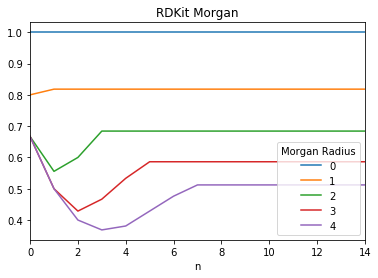

In [5]:
rdkit_sim_df.plot()
plt.legend(loc=4,title='Morgan Radius')
plt.title('RDKit Morgan')
plt.show()

Write out the smiles to calculate the correponding chiral ECFP Similarities and read back in the results

In [6]:
smiles_df.to_csv('/home/schufan1/projects/Melloddy/chiral_test_smiles.txt',sep='\t')

In [7]:
pp_sim_df = pd.read_csv('/home/schufan1/projects/Melloddy/chiral_test_ECFP_PP_sim.txt',sep='\t',index_col= 'n')

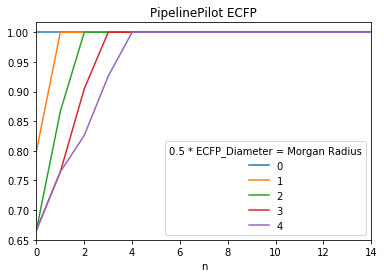

In [8]:
pp_sim_df[['0','1','2','3','4']].plot()
plt.legend(loc=4,title='0.5 * ECFP_Diameter = Morgan Radius')
plt.title('PipelinePilot ECFP')
plt.show()